In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("/content/datasets-11657-16098-train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(['PassengerId', 'Cabin'],axis= 1, inplace= True)

In [ ]:
df.shape

(891, 10)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
print("Average Fare: ", df['Fare'].mean())

Average Fare:  32.2042079685746


In [ ]:
print("Average Age: ", df['Age'].mean())

Average Age:  29.69911764705882


In [ ]:
print("Average Age: ", round(df['Age'].mean(), 3))   # To roundoff the decimal

Average Age:  29.699


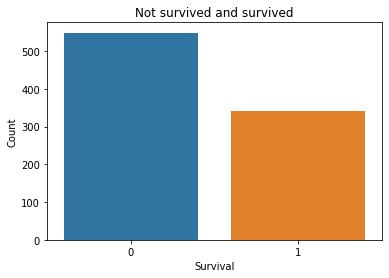

In [ ]:
sns.countplot(df['Survived']) # using seaborn to count
plt.title("Not survived and survived")# Matplot to plot
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()


In [ ]:
first_class_count = (df['Pclass'] == 1).sum()
print('First Class: ',first_class_count)
second_class_count = (df['Pclass'] == 2).sum()
print('Second Class: ',second_class_count)
third_class_count = (df['Pclass'] == 3).sum()
print('Third Class: ',third_class_count)

First Class:  216
Second Class:  184
Third Class:  491


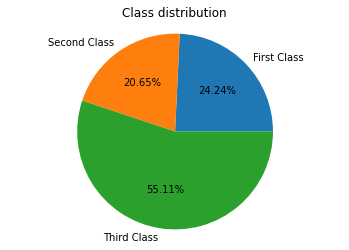

In [ ]:
labels = ['First Class', 'Second Class', 'Third Class']
sizes = [first_class_count, second_class_count, third_class_count]
plt.pie(sizes, labels=labels, autopct = '%1.2f%%') # autopct formula to calulate class count as per percentage
plt.axis('equal') #to make it to circle if the pie is in the shape of oval
plt.title('Class distribution')
plt.show()

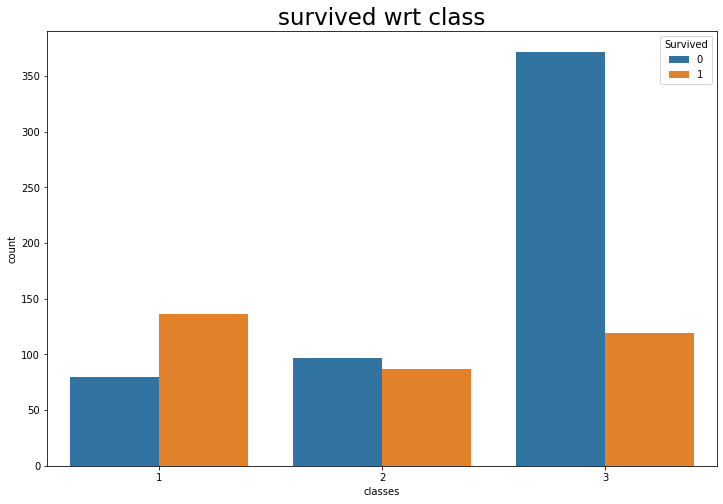

In [ ]:
plt.figure(figsize =(12,8)) # To make the figure big
sns.countplot(x=df['Pclass'], hue=df['Survived']) #hue is to differentiate the color
plt.title('survived wrt class', fontsize=23)
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

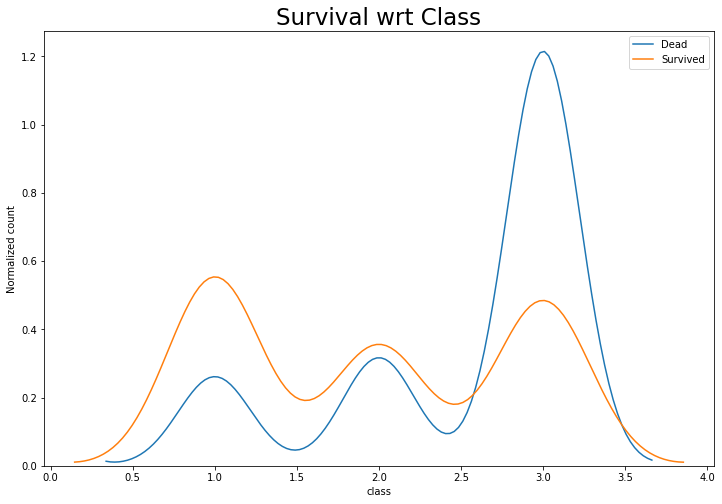

In [ ]:
plt.figure(figsize = (12,8))
axs = sns.kdeplot(df.Pclass[df.Survived == 0], label ='Dead')
axs = sns.kdeplot(df.Pclass[df.Survived == 1], label ='Survived')
plt.title('Survival wrt Class', fontsize=23)
plt.xlabel('class')
plt.ylabel('Normalized count')
plt.show()

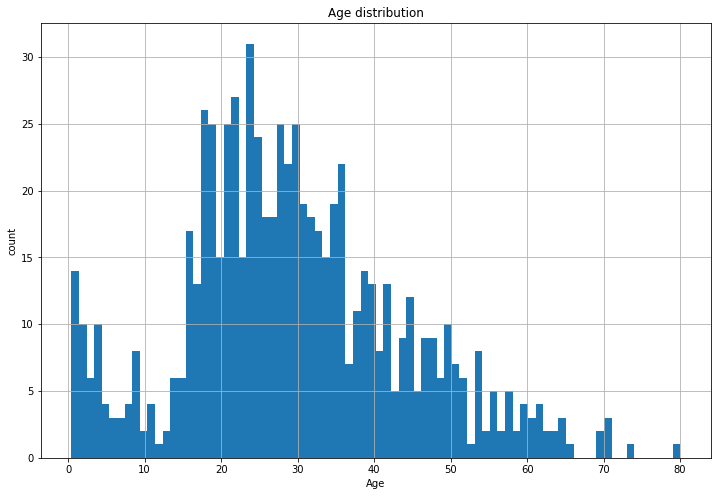

In [ ]:
#plt.figure(figsize=(12,8))
df.hist(column= 'Age', bins= 80, figsize=(12,8))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

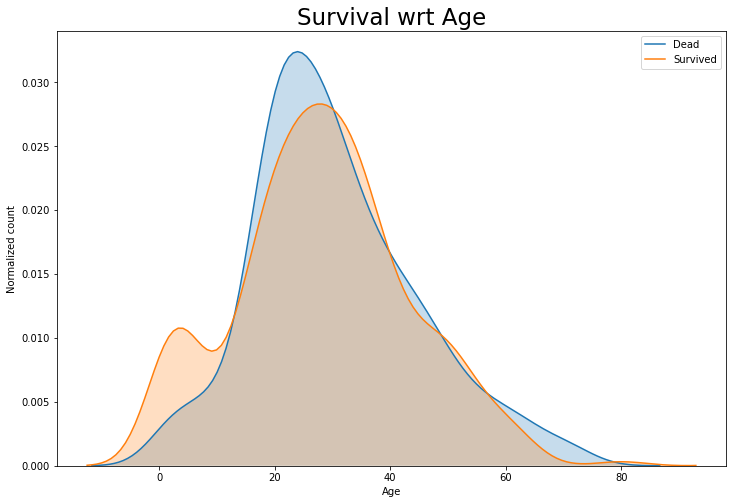

In [ ]:
plt.figure(figsize = (12,8))
axs = sns.kdeplot(df.Age[df.Survived == 0], shade= True, label ='Dead')
axs = sns.kdeplot(df.Age[df.Survived == 1], shade= True, label ='Survived')
plt.title('Survival wrt Age', fontsize=23)
plt.xlabel('Age')
plt.ylabel('Normalized count')
plt.show()

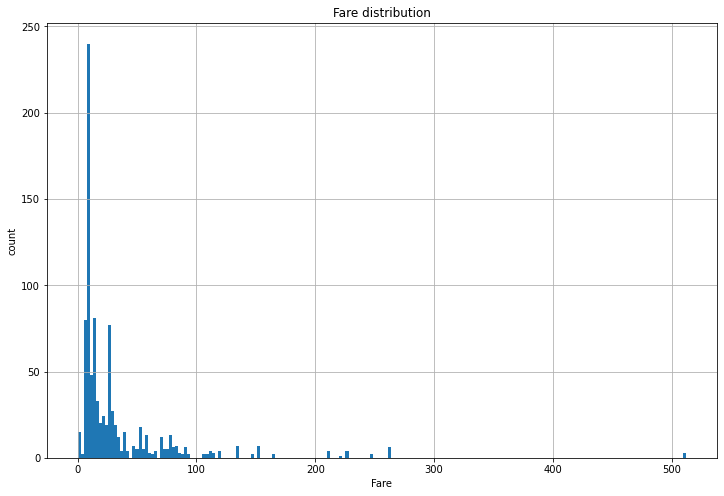

In [ ]:
df.hist(column= 'Fare', bins= 200, figsize=(12,8))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [ ]:
Survived_above_500 = ((df['Fare']> 500)& (df['Survived']==1)).sum()
print('Number of people survived after paying morethan 500 dollars are: ',Survived_above_500)

Number of people survived after paying morethan 500 dollars are:  3


In [ ]:
df.loc[df['Fare']> 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


Text(0.5, 0, 'Age')

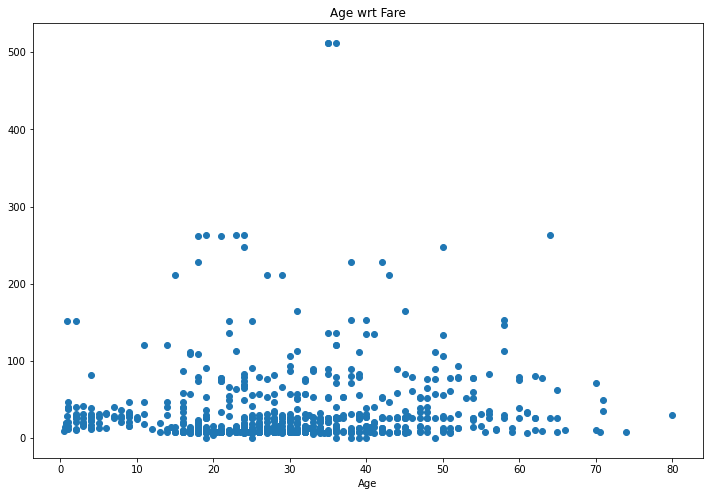

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['Age'],df['Fare'])
plt.title('Age wrt Fare')
plt.xlabel('Age')

In [ ]:
male_dead= ((df['Sex']== 'male')& (df['Survived']== 0)).sum()
print('male dead: ',male_dead)

male_survived= ((df['Sex']== 'male')& (df['Survived']== 1)).sum()
print('male survived: ',male_survived)

female_dead= ((df['Sex']== 'female')& (df['Survived']== 0)).sum()
print('female dead: ',female_dead)

female_survived= ((df['Sex']== 'female')& (df['Survived']== 1)).sum()
print('female survived: ',female_survived)

male dead:  468
male survived:  109
female dead:  81
female survived:  233


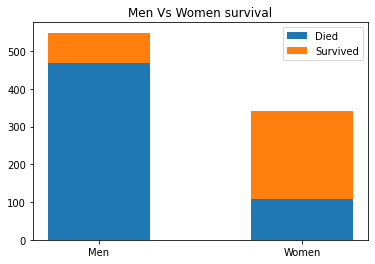

In [ ]:
m_details= (male_dead, male_survived)
f_details= (female_dead, female_survived)
p1 = plt.bar(np.arange(2), (m_details), width= 0.5)
p2 = plt.bar(np.arange(2), (f_details), bottom= m_details, width= 0.5)
plt.xticks(np.arange(2), ['Men', 'Women'])
plt.legend((p1[0], p2[0]),('Died', 'Survived'))
plt.title('Men Vs Women survival')
plt.show()

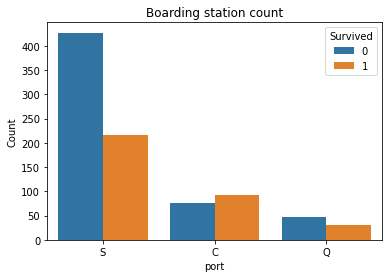

In [ ]:
sns.countplot(x=df['Embarked'], hue=df['Survived'])
plt.title('Boarding station count')
plt.xlabel('port')
plt.ylabel('Count')
plt.show()

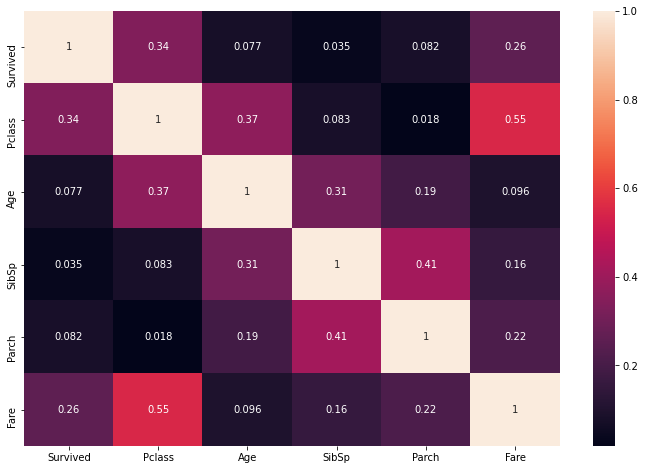

In [ ]:
plt.figure(figsize= (12,8))                             #lighter colour indicates high relation
axs = sns.heatmap(df.corr().abs(), annot = True)        #EX: Here class is mostly related to Fare
plt.show()

In [ ]:
df['Sex'] = df['Sex'].replace('male',1)              #Converting categorical values to numerical get the relation between the different aspects using heatmap.
df['Sex'] = df['Sex'].replace('female',0)

In [ ]:
df['Embarked'] = df['Embarked'].replace('C',1)       #Converting categorical values to numerical get the relation between the different aspects using heatmap.
df['Embarked'] = df['Embarked'].replace('Q',2)
df['Embarked'] = df['Embarked'].replace('S',3)

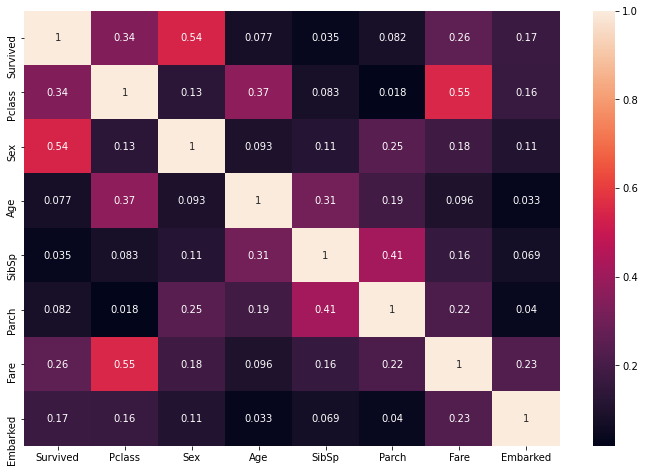

In [ ]:
plt.figure(figsize= (12,8))
axs = sns.heatmap(df.corr().abs(), annot = True)
plt.show()